In [10]:
import pandas as pd
from matplotlib import pyplot
import numpy
import math
import cmath
import sys
from scipy.io import wavfile
import timeit
from scipy.fftpack import fft, ifft

In [11]:
def length_of_sound(data, rate):
  return data.shape[0] / rate

def print_data(name, data, rate, sound_length):
  print('====================' +
        '\n Metadata of ' + name + ' sound ' +
        '\n Number of channels: ' + str(data.shape[1]) +
        '\n Length of the sound file: ' + str(sound_length) + 's' + 
        '\n Sampling rate: ' + str(rate / 1000) + ' kHZ')

In [12]:
# Load sound files
sound_files = ['sounds/bag-zipper-2.wav',
               'sounds/empty-bullet-shell-fall-01.wav',
               'sounds/footsteps-4.wav',
               'sounds/creaking-door-2.wav',
               'sounds/matches-3.wav',
               'sounds/coin-drop-4.wav',
               'sounds/button-46.wav']

data = []
rates = []
sound_lengths = []
for file in sound_files:
  rate, sound_data = wavfile.read(file)
  rates.append(rate)
  data.append(sound_data)
  sound_lengths.append(length_of_sound(sound_data, rate))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


In [13]:
for i in range(0, len(sound_files)):
  print_data(sound_files[i], data[i], rates[i], sound_lengths[i])

 Metadata of sounds/bag-zipper-2.wav sound 
 Number of channels: 2
 Length of the sound file: 3.2s
 Sampling rate: 48.0 kHZ
 Metadata of sounds/empty-bullet-shell-fall-01.wav sound 
 Number of channels: 2
 Length of the sound file: 2.9973696145124715s
 Sampling rate: 44.1 kHZ
 Metadata of sounds/footsteps-4.wav sound 
 Number of channels: 2
 Length of the sound file: 2.496s
 Sampling rate: 48.0 kHZ
 Metadata of sounds/creaking-door-2.wav sound 
 Number of channels: 2
 Length of the sound file: 2.7733333333333334s
 Sampling rate: 48.0 kHZ
 Metadata of sounds/matches-3.wav sound 
 Number of channels: 2
 Length of the sound file: 1.984s
 Sampling rate: 48.0 kHZ
 Metadata of sounds/coin-drop-4.wav sound 
 Number of channels: 2
 Length of the sound file: 0.5973333333333334s
 Sampling rate: 48.0 kHZ
 Metadata of sounds/button-46.wav sound 
 Number of channels: 2
 Length of the sound file: 0.11417233560090703s
 Sampling rate: 44.1 kHZ


In [14]:
def get_previous_power_of_2(data): # find previous power of 2 for given number (data parameter – number)
  N = data.shape[0]
  oldN = N
  newN = 1 << int(numpy.log(N) // numpy.log(2)) # drop set bits from N except the very last set bit.
  print("old N is ", oldN, "-- newN is", newN)
  return newN

In [15]:

for i in range(0, len(sound_files)):
  # for now just printing how long should files be for them to have N to the power of 2
  newLength = get_previous_power_of_2(data[i])
  print("\nold length [s] is ", data[i].shape[0] / rates[i], "s and new length in [s] is ", newLength / rates[i])
  n = len(data[i]) - newLength
  data[i] = data[i] [:-n]


old N is  153600 -- newN is 131072

old length [s] is  3.2 s and new length in [s] is  2.7306666666666666
old N is  132184 -- newN is 131072

old length [s] is  2.9973696145124715 s and new length in [s] is  2.972154195011338
old N is  119808 -- newN is 65536

old length [s] is  2.496 s and new length in [s] is  1.3653333333333333
old N is  133120 -- newN is 131072

old length [s] is  2.7733333333333334 s and new length in [s] is  2.7306666666666666
old N is  95232 -- newN is 65536

old length [s] is  1.984 s and new length in [s] is  1.3653333333333333
old N is  28672 -- newN is 16384

old length [s] is  0.5973333333333334 s and new length in [s] is  0.3413333333333333
old N is  5035 -- newN is 4096

old length [s] is  0.11417233560090703 s and new length in [s] is  0.09287981859410431


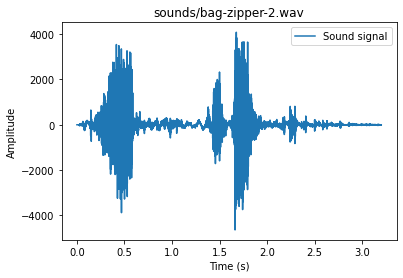

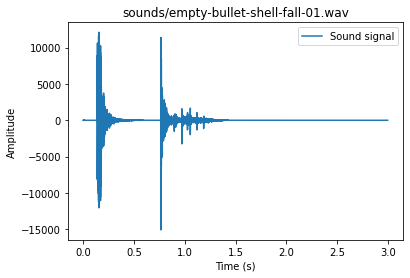

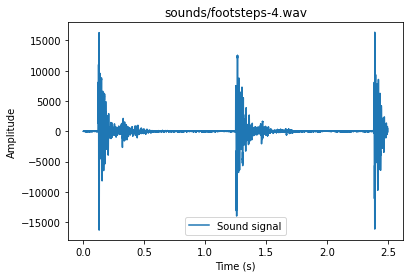

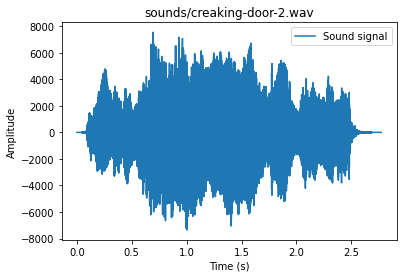

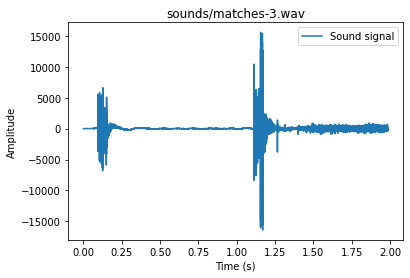

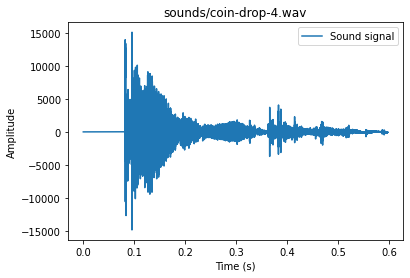

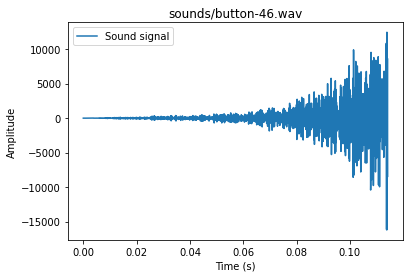

In [16]:
def sound_graph(name, sound_length, data, FFT_DFT_signal = False):
  x = numpy.linspace(0, sound_length, data.shape[0])
  pyplot.plot(x, data, label="Sound signal")
  pyplot.legend()
  pyplot.title(name)
  if FFT_DFT_signal:
      pyplot.xlabel("Frequency (Hz)")
  else:
      pyplot.xlabel("Time (s)")
  pyplot.ylabel("Amplitude")
  pyplot.show()

  
# Converting from stereo to mono
for i in range(0, len(sound_files)):
  single_data = data[i]
  single_data = (single_data[:,0] + single_data[:,1]) / 2
  data[i] = single_data
  sound_graph(sound_files[i], sound_lengths[i], data[i])

In [17]:
# DFT and FFT implementations

# Mokymo priemonė - 65th & 66th equations

def DFT_function(data, inverted = False):

    N = data.shape[0] # Samples
    ck = [] # Fourier coefficients
    multiplier = -1j if inverted else 1j
    divisor = 1 if inverted else N
    
    for j in range(0, N - 1):

        sum = 0

        for k in range(0, N - 1):
            sum += data[k] * numpy.e ** (multiplier * (2 * numpy.pi / N) * j * k)

        ck.append(sum / divisor)

    return ck

# Mokymo priemonė - 79th equation

def FFT_function(data, inverse = False):

    N = data.shape[0] # Samples
    multiplier = -1j if inverse else 1j
    divisor = N if inverse else 1

    if N == 1:
      return data

    ck = numpy.zeros(N, dtype = numpy.complex_) 
    Wn = numpy.exp(multiplier * 2 * (numpy.pi / N)) * ( 1 / divisor)

    ck_even = FFT_function(data[0:N:2])
    ck_odd = FFT_function(data[1:N:2])

    for k in range(0, numpy.floor_divide(N, 2)):
      
        ck[k] = (ck_even[k] + numpy.power(Wn, k) * ck_odd[k])
        ck[k + numpy.floor_divide(N, 2)] = (ck_even[k] - numpy.power(Wn, k) * ck_odd[k])

    return ck

Original signal: 
___________________________________________________________________________


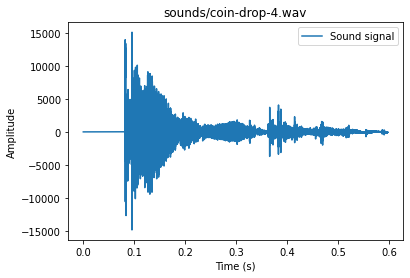

FFT Test: 
___________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


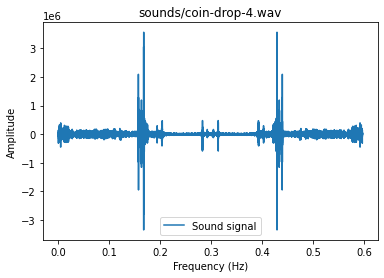

Inverse FFT Test: 
___________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


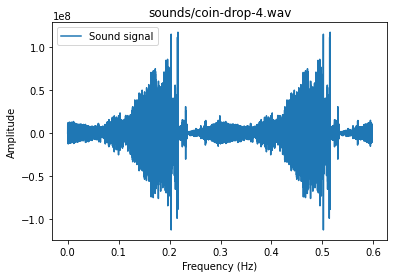

DFT Test: 
___________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


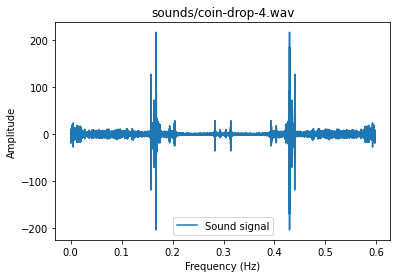

Inverse DFT Test: 
___________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


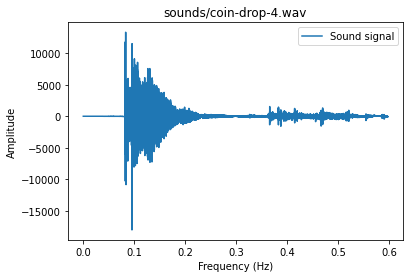

Original signal: 
___________________________________________________________________________


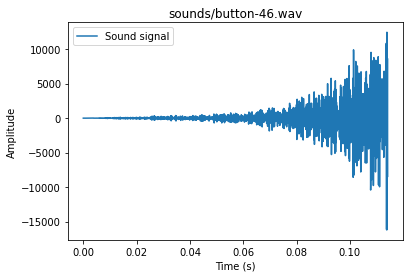

FFT Test: 
___________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


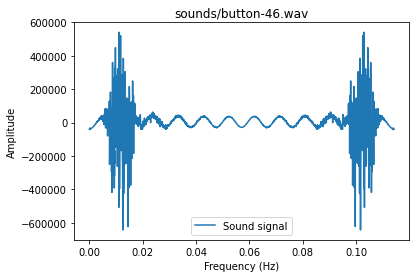

Inverse FFT Test: 
___________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


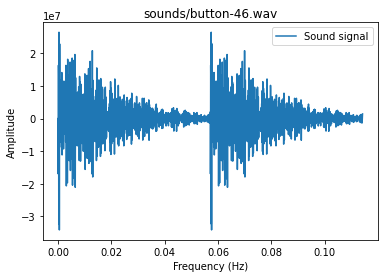

DFT Test: 
___________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


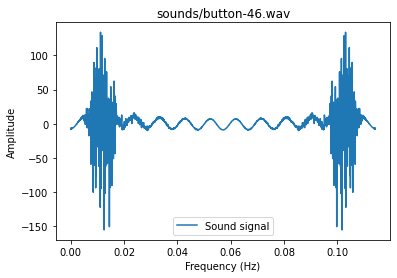

Inverse DFT Test: 
___________________________________________________________________________


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


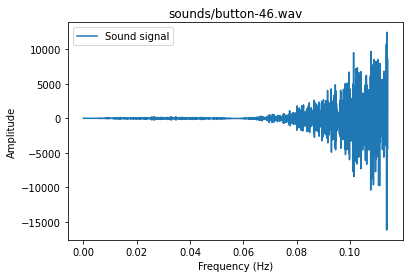

In [18]:
# Test DFT and FFT with some sound signals

for i in range(5, len(sound_files)):
  print("Original signal: ")
  print("___________________________________________________________________________")
  sound_graph(sound_files[i], sound_lengths[i], data[i])
  testFFT = numpy.asarray(FFT_function(data[i]))
  print("FFT Test: ")
  print("___________________________________________________________________________")
  sound_graph(sound_files[i], sound_lengths[i], testFFT, True)
  print("Inverse FFT Test: ")
  print("___________________________________________________________________________")
  sound_graph(sound_files[i], sound_lengths[i], numpy.asarray(FFT_function(testFFT, True)), True)
  test = numpy.asarray(DFT_function(data[i]))
  print("DFT Test: ")
  print("___________________________________________________________________________")
  sound_graph(sound_files[i], sound_lengths[i], test, True)
  print("Inverse DFT Test: ")
  print("___________________________________________________________________________")
  sound_graph(sound_files[i], sound_lengths[i], numpy.asarray(DFT_function(test, True)), True)


FFT and DFT computational time comparison

In [19]:
# print("FFT test with real data (coin drop sound signal): ")
# %timeit FFT_function(data[5])
# print("DFT test with real data (coin drop sound signal): ")
# %timeit DFT_function(data[5])

print("FFT test with real data (button sound signal): ")
%timeit FFT_function(data[6])
print("DFT test with real data (button sound signal): ")
%timeit DFT_function(data[6])

FFT test with real data (button sound signal): 
1 loop, best of 5: 240 ms per loop
DFT test with real data (button sound signal): 
1 loop, best of 5: 50.9 s per loop
